In [ ]:
# license: GPL v3
# authors: Sylwester Arabas, Michael Olesik, Piotr Bartman
# copyright: Jagiellonian University
# based on Fig. 1 from Arabas & Farhat 2019 (https://doi.org/10.1016/j.cam.2019.05.023)

In [1]:
%run _demo_common.ipynb

In [2]:
from MPyDATA_examples.Arabas_and_Farhat_2019.simulation import Simulation
from MPyDATA_examples.Arabas_and_Farhat_2019.setup1_european_corridor import Setup

In [3]:
setup = Setup()
simulation = Simulation(setup)

In [4]:
S = simulation.S
psi_T = simulation.terminal_value()
psi_0 = simulation.run(n_iters=2)
psi_a = setup.analytical_solution(S)

<IPython.core.display.Javascript object>


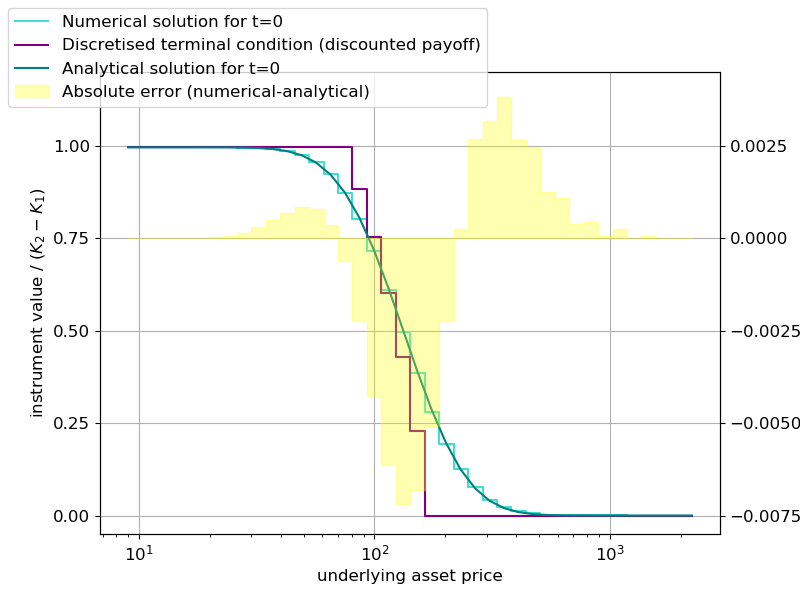

In [5]:
fig, ax1 = pyplot.subplots()
yscl = 1 / (setup.K2 - setup.K1)
ax2 = pyplot.twinx()
ax2.fill_between(S, yscl*(psi_0-psi_a), step="mid", label='Absolute error (numerical-analytical)', alpha=.3, color='yellow')
ax2.set_ylabel("absolute error / ($K_2-K_1$)")
ax1.step(S, yscl*psi_0, where='mid', label='Numerical solution for t=0', color=colors[2])
ax1.step(S, yscl*psi_T, where='mid', label="Discretised terminal condition (discounted payoff)", color=colors[0])
ax1.plot(S, yscl*psi_a, label='Analytical solution for t=0', color=colors[1])
ax1.set_xscale("log")
ax1.grid()
ax1.set_xlabel("underlying asset price")
ax1.set_ylabel("instrument value / ($K_2-K_1$)")
ax1.set_ylim((-.05, 1.2))
ax1.set_yticks(np.arange(0, 1.25, 0.25))
ax2.set_ylim((-.008,.0045))
ax2.set_yticks(np.arange(-.0075, .005, .0025))
fig.legend(loc='upper left')
fig.show()